## 00c: Linear Regression Intro

Now that we know how to minimize a function, let's use that math knowledge and learn how to fit a line of best fit to data.

Let's say you are an agronomist. You want to be able to predict the amount of bushels of corn at harvest time, based on rainfall during the growing season. You suspect that this relationship is mostly linear: for every extra X inches of rainfall, you will get Y more bushels of corn. You expect there to be some variation in there from other factors (how sunny it was that year, what was the temperature, price of corn).

You suspect that the relationship is mostly linear, but you don't know exactly how many extra units of corn you'll get for some extra units of rain. You want to discover, or *learn*, what the relationship is.

This kind of problem is called a *linear regression* problem. Regression means learning to predict a continuous-ranged value like "number of bushels of corn." It's a *linear* regression because you're trying to find a line that associates $x$ values to $y$ values.

To get started, let's generate a synthetic dataset.

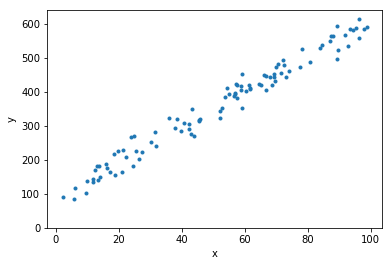

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# So we generate the same data each time!
np.random.seed(0)

class Dataset:
    NOISE_STDDEV = 25
    NUM_SAMPLES = 100
    THETA0 = 100.0
    THETA1 = 5.0

    @classmethod
    def generate_data(cls):
        xs = []
        ys = []
        noises = []
        for _ in range(cls.NUM_SAMPLES):
            # Sample a random x value between 0 and 100.
            x_observation = np.random.uniform(low = 0.0, high = 100.0)
            y_observation = cls.THETA0 + (x_observation * cls.THETA1)
            # Add some "noise" to y
            noise = np.random.normal(scale = cls.NOISE_STDDEV)
            y_observation += noise

            xs.append(x_observation)
            ys.append(y_observation)
            noises.append(noise)

        # Return numpy arrays of the data values.
        return np.array(xs), np.array(ys), np.array(noises)

    def __init__(self):
        self.x, self.y, self.noises = type(self).generate_data()

    def plot(self, axes):
        axes.plot(self.x, self.y, ".")
        axes.set_ylabel("y")
        axes.set_xlabel("x")
        # Even if all data is positive, show y axis
        axes.set_ylim(ymin = np.min((np.min(self.y), 0)))

        return axes

DATASET = Dataset()

DATASET.plot(plt.figure().add_subplot(111))

Here we see the dataset. 

First I generated $x$ values by randomly picking in the range of zero to one hundred. Then I used a "true" value `THETA0` and `THETA1` to calculate $y = \theta_0 + \theta_1 x$.

I then added in some *noise* to the value of $y$. That noise represents variation caused by other factors than the amount of rainfall. That's why no line goes exactly through the points.

Let's graph the true relationship between rainfall and bushels of corn.

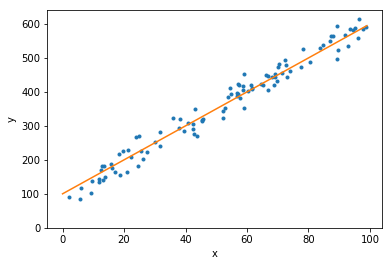

In [3]:
axes = plt.figure().add_subplot(111)
DATASET.plot(axes)
x_range = np.arange(0, 100)
true_y = Dataset.THETA0 + Dataset.THETA1 * x_range
axes.plot(x_range, true_y, "-")

Okay, but what if we only saw the blue datapoints without the orange line? We'd have to try to find a *line of best fit*. Since any line is defined by an intercept and a slope, what we're really trying to find is an *estimate* of the true $\theta_0, \theta_1$ values. We call $\theta_0, \theta_1$ the *parameters* of the *model* we are trying to learn.

Before we go about asking how to find those estimates, let's first talk about what it means for a line of best fit to be the *best*. We can't directly compare our estimates of $\theta_0, \theta_1$ to the true values of $\theta_0, \theta_1$, because in real life we won't know the true $\theta_0, \theta_1$.

What we do is look at how well the line matches up with the previously observed data. For any given observed $x_i$ value, it's very likely that $\hat\theta_0 + \hat\theta_1 x_i$ won't be quite $y_i$ exactly. (We use the "hat" to indicate that this is our estimate of $\theta_0, \theta_1$, not the true value). We sometimes write $\hat\theta_0 + \hat\theta_1 x_i = \hat{y}_i$.

All else equal, it is better if $\hat{y}_i$ is closer to the true $y_i$. That is, we want the magnitude of $\hat{y}_i - y_i$ to be small. $\hat{y}_i - y_i$ is called the *error* of the model at the datapoint $(x_i, y_i)$.

The overall error comes from summing up the errors at the individual datapoints. We denote the error of an estimate $\hat\theta_0, \hat\theta_1$ by $E(\hat\theta_0, \hat\theta_1)$. Smaller error means a better line than larger error.

Now, here's a definition that's *not quite* right:

\\[
E(\hat\theta_0, \hat\theta_1) = \sum_{i = 1}^N ((\theta_0 + \theta_1 x_i) - y_i) \quad\text{(wrong!)}
\\]

If this were the definition, then *overprediction* errors would add to the total error, but then *underprediction* errors would *reduce* the error. We want over and underprediction to contribute equally to error. So here is one possible fix:

\\[
E(\hat\theta_0, \hat\theta_1)
=
\sum_{i = 1}^N \left|(\theta_0 + \theta_1 x_i) - y_i\right|
\quad\text{(uncommon!)}
\\]

While you can theoretically use this formula, it is not common to do so. It is more common to use:

\\[
E(\hat\theta_0, \hat\theta_1)
=
\sum_{i = 1}^N ((\theta_0 + \theta_1 x_i) - y_i)^2
\quad\text{(correct!)}
\\]

Because squaring makes a negative quantity positive, this means that under and overprediction are treated equally.

Why use this error? It turns out there are several good reasons for doing so. But we will talk about those later.

This error function is called the *sum of squared errors* or SSE.

Let's calculate the SSE of our dataset using the "true" parameters `THETA0, THETA1`. The SSE will not be zero because even though this is the true line, it still mispredicts the $y_i$ values a little because of random variation caused by other noise factors.

In [5]:
def calculate_sse(x, y, theta0, theta1):
    return np.sum(
        ((theta0 + theta1 * x) - y) ** 2
    )

print(
    calculate_sse(DATASET.x, DATASET.y, Dataset.THETA0, Dataset.THETA1)
)

59633.1860579
